In [14]:
# Import custom modules for various functionalities
from custom_modules.nan_finder import find_nan_columns  # Function to find columns with NaN values
from custom_modules.keypoints_display_df import show_multiple_images_with_keypoints_in_dataframe  # Function to display images with keypoints from a DataFrame
from custom_modules.keypoints_display_tf import show_multiple_images_with_keypoints_in_tf_datasets  # Function to display images with keypoints from TensorFlow datasets
from custom_modules.keypoints_flip_tf import flip_coordinate_and_image_horizontal_in_tf_dataset, flip_coordinate_and_image_vertical_in_tf_dataset  # Functions to flip coordinates and images horizontally and vertically in TensorFlow datasets
from custom_modules.keypoints_flip_df import flip_coordinate_and_image_horizontal_in_df, flip_coordinate_and_image_vertical_in_df  # Functions to flip coordinates and images horizontally and vertically in DataFrames
from custom_modules.sobel_module import tf_compute_sobel  # Function to compute Sobel edges using TensorFlow
from custom_modules.canny_module import tf_compute_canny  # Function to compute Canny edges using TensorFlow

# Import necessary libraries
import tensorflow as tf  # TensorFlow for machine learning and deep learning tasks
import matplotlib.pyplot as plt  # Matplotlib for plotting and visualization
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis

In [2]:
# Define paths to the training and test datasets
train_path = './Assets/datasets/training.csv'
test_path = './Assets/datasets/test.csv'

# Load the datasets into Pandas DataFrames
train_data = pd.read_csv(train_path)  
test_data = pd.read_csv(test_path)

In [3]:
# Display the first row of the training data
train_data[:1]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [4]:
# Display the first row of the test data
test_data[:1]

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...


In [5]:
# Display information about the training data, including memory usage
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [6]:
# Display information about the test data, including memory usage
test_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1)
memory usage: 57.2 MB


In [7]:
# Find columns with NaN values in the training data, focusing on 'facial_key_points' columns
get_nan_in_train_data = find_nan_columns(train_data, name_columns='facial_key_points', max_display=2)

left_eye_center_x:	Jumlah NaN: 10
left_eye_center_y:	Jumlah NaN: 10
right_eye_center_x:	Jumlah NaN: 13
right_eye_center_y:	Jumlah NaN: 13
left_eye_inner_corner_x:	Jumlah NaN: 4778
left_eye_inner_corner_y:	Jumlah NaN: 4778
left_eye_outer_corner_x:	Jumlah NaN: 4782
left_eye_outer_corner_y:	Jumlah NaN: 4782
right_eye_inner_corner_x:	Jumlah NaN: 4781
right_eye_inner_corner_y:	Jumlah NaN: 4781
right_eye_outer_corner_x:	Jumlah NaN: 4781
right_eye_outer_corner_y:	Jumlah NaN: 4781
left_eyebrow_inner_end_x:	Jumlah NaN: 4779
left_eyebrow_inner_end_y:	Jumlah NaN: 4779
left_eyebrow_outer_end_x:	Jumlah NaN: 4824
left_eyebrow_outer_end_y:	Jumlah NaN: 4824
right_eyebrow_inner_end_x:	Jumlah NaN: 4779
right_eyebrow_inner_end_y:	Jumlah NaN: 4779
right_eyebrow_outer_end_x:	Jumlah NaN: 4813
right_eyebrow_outer_end_y:	Jumlah NaN: 4813
nose_tip_x:	
nose_tip_y:	
mouth_left_corner_x:	Jumlah NaN: 4780
mouth_left_corner_y:	Jumlah NaN: 4780
mouth_right_corner_x:	Jumlah NaN: 4779
mouth_right_corner_y:	Jumlah NaN:

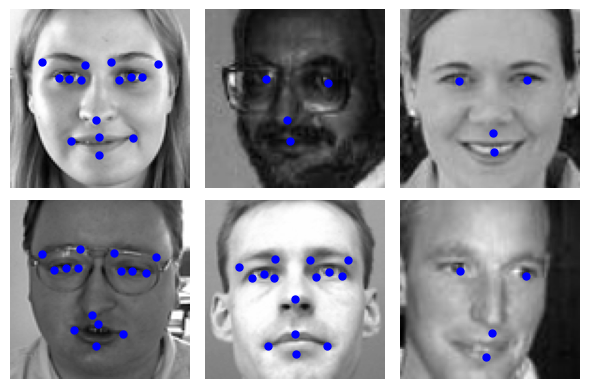

In [15]:
# Define the columns that contain keypoints
keypoints_columns = train_data.columns[:-1]
# Display multiple images with keypoints from the training data
show_multiple_images_with_keypoints_in_dataframe(
    train_data, 
    image_column='Image',  # Column containing image data
    # parent_path='./Assets/Images/',  # Optional path to images if stored separately
    keypoints_columns=keypoints_columns,  # Columns containing keypoints
    num_images=6,  # Number of images to display
    image_size=(96, 96),  # Size of each image
    figsize_per_image=(2, 2),  # Size of each figure in the plot
    scatter_size=100,  # Size of keypoints in the scatter plot
    n_seed=None  # Random seed for reproducibility (optional)
)

In [16]:
# Create a deep copy of the training data
train_data_copy = train_data.copy(deep=True)

In [10]:
# Drop rows with NaN values from the copied training data
# train_data_copy.dropna(inplace=True)

In [10]:
# Find columns with NaN values in the copied training data, focusing on 'facial_key_points' columns
get_nan_in_train_data_copy = find_nan_columns(train_data_copy, name_columns='facial_key_points', max_display=3)

left_eye_center_x:	Jumlah NaN: 10
left_eye_center_y:	Jumlah NaN: 10
right_eye_center_x:	Jumlah NaN: 13
right_eye_center_y:	Jumlah NaN: 13
left_eye_inner_corner_x:	Jumlah NaN: 4778
left_eye_inner_corner_y:	Jumlah NaN: 4778
left_eye_outer_corner_x:	Jumlah NaN: 4782
left_eye_outer_corner_y:	Jumlah NaN: 4782
right_eye_inner_corner_x:	Jumlah NaN: 4781
right_eye_inner_corner_y:	Jumlah NaN: 4781
right_eye_outer_corner_x:	Jumlah NaN: 4781
right_eye_outer_corner_y:	Jumlah NaN: 4781
left_eyebrow_inner_end_x:	Jumlah NaN: 4779
left_eyebrow_inner_end_y:	Jumlah NaN: 4779
left_eyebrow_outer_end_x:	Jumlah NaN: 4824
left_eyebrow_outer_end_y:	Jumlah NaN: 4824
right_eyebrow_inner_end_x:	Jumlah NaN: 4779
right_eyebrow_inner_end_y:	Jumlah NaN: 4779
right_eyebrow_outer_end_x:	Jumlah NaN: 4813
right_eyebrow_outer_end_y:	Jumlah NaN: 4813
nose_tip_x:	
nose_tip_y:	
mouth_left_corner_x:	Jumlah NaN: 4780
mouth_left_corner_y:	Jumlah NaN: 4780
mouth_right_corner_x:	Jumlah NaN: 4779
mouth_right_corner_y:	Jumlah NaN:

In [11]:
# Print the first 10 characters of the first image data, its length, and its type
print(f'''
data: {train_data_copy['Image'][0][:10]}
len: {len(train_data_copy['Image'][0][:10])}
type: {type(train_data_copy['Image'][0][:10])}
''')


data: 238 236 23
len: 10
type: <class 'str'>



In [17]:
# Calculate the length of the image data and the target reshape size
length_data = len(train_data_copy['Image'][[0]].str.split(' ')[0])
target_reshape = int(np.sqrt(length_data))

# Print the length of the image data and the target reshape size
print(f'''
length data: {length_data}
target_reshape: {target_reshape}
''')



length data: 9216
target_reshape: 96



In [18]:
# Extract image data and facial keypoints from the copied training data
train_data_images = train_data_copy['Image'].values
train_data_facial_keypoints = train_data_copy.drop(columns=['Image']).values

In [19]:
# Create a TensorFlow dataset from the image data and facial keypoints
facial_keypoints_train_datasets = tf.data.Dataset.from_tensor_slices((train_data_images, train_data_facial_keypoints))

# Print information about the TensorFlow dataset and the number of data points
print(f'info data: {facial_keypoints_train_datasets}')
print(f'number of data: {len(facial_keypoints_train_datasets)}')

info data: <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>
number of data: 7049


==========================Check data=========================
    img value: b'238 236 237 238 240 '
    dtype img: <class 'bytes'>
    keypoint value: [66.03356391 39.00227368 30.22700752 36.4216782  59.58207519 39.64742256
 73.13034586 39.96999699 36.35657143 37.3894015  23.45287218 37.3894015
 56.95326316 29.03364812 80.22712782 32.22813835 40.22760902 29.0023218
 16.35637895 29.64747068 44.42057143 57.06680301 61.19530827 79.97016541
 28.61449624 77.38899248 43.3126015  72.93545865 43.13070677 84.48577444]
    dtype keypoint: float64
=======================Convert to List=======================
    vector of img: [b'238' b'236' b'237' ... b'70' b'75' b'90'] 
    shape img: (9216,)
    dtype img: <dtype: 'string'>
======================Convert to Numeric=====================
    vector of img: [238. 236. 237. ...  70.  75.  90.] 
    shape img: (9216,)
    dtype img: <dtype: 'float32'>
    target image ndim: 96.0
    max intensity: 253.0
    min intensity: 2.0
============Reshape to

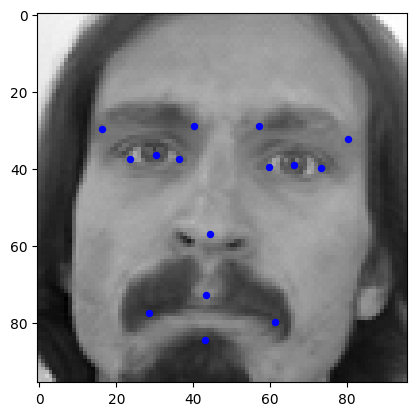

In [16]:
for img, keypoint in facial_keypoints_train_datasets.take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    img value: {img[:20]}
    dtype img: {type(img)}
    keypoint value: {keypoint}
    dtype keypoint: {keypoint.dtype}'''
    )

    print(f"{'Convert to List'.center(61, '=')}")
    cvt_to_list = tf.strings.split(img, sep=' ')
    print(f'''    vector of img: {cvt_to_list} 
    shape img: {cvt_to_list.shape}
    dtype img: {cvt_to_list.dtype}'''
    )
    
    print(f"{'Convert to Numeric'.center(61, '=')}")
    cvt_to_num = image = tf.strings.to_number(cvt_to_list, out_type=tf.float32)
    print(f'''    vector of img: {cvt_to_num} 
    shape img: {cvt_to_num.shape}
    dtype img: {cvt_to_num.dtype}
    target image ndim: {tf.math.sqrt(cvt_to_num.shape[0] / 1.)}
    max intensity: {tf.reduce_max(cvt_to_num)}
    min intensity: {tf.reduce_min(cvt_to_num)}'''
    )

    print(f"{'Reshape to height and width dimension'.center(61, '=')}")
    cvt_to_img = tf.reshape(cvt_to_num, (96, 96))
    print(f'''    matriks of img: {cvt_to_img} 
    shape img: {cvt_to_img.shape}
    dtype img: {cvt_to_img.dtype}
    max intensity: {tf.reduce_max(cvt_to_img)}
    min intensity: {tf.reduce_min(cvt_to_img)}'''
    )

    print(f"{'Normalized image'.center(61, '=')}")
    normalized_img = (cvt_to_img / 255) * 1.0
    print(f'''    matriks of img: {normalized_img} 
    shape img: {normalized_img.shape}
    dtype img: {normalized_img.dtype}
    max intensity: {tf.reduce_max(normalized_img)}
    min intensity: {tf.reduce_min(normalized_img)}'''
    )

    for i in range(0, len(keypoint), 2):
        x = keypoint[i]
        y = keypoint[i+1]
        plt.scatter(x, y, s=75, marker='.', c='blue')
    plt.imshow(normalized_img, cmap='gray')
plt.show()

In [20]:
# Define a function to preprocess the training data
def preprocessing_train_data(image, keypoint=None, input_shape=None):
    # Split the image data string into individual pixel values
    image = tf.strings.split(image, sep=' ')
    # Convert the pixel values to float32
    image = tf.strings.to_number(image, out_type=tf.float32)
    # Normalize the pixel values to the range [0, 1]
    image = (image / 255) * 1.0
    # Reshape the image to the specified input shape
    image = tf.reshape(image, input_shape)
    return image, keypoint

# Define a function to replace NaN values in keypoints with zeros
def replace_nan_with_zero(image, keypoint):
    keypoint = tf.where(tf.math.is_nan(keypoint), tf.zeros_like(keypoint), keypoint)
    return image, keypoint

# Define a function to check for NaN values in keypoints
def get_nan_in_data(image, keypoint):
    # Check if there are any NaN values in the keypoints
    get_nan_in_data = tf.reduce_any(tf.math.is_nan(keypoint))
    return get_nan_in_data


In [22]:
# Filter the dataset to get only the data points with NaN values in keypoints
get_nan_infacial_keypoints_train_datasets = facial_keypoints_train_datasets.filter(get_nan_in_data)

# Print the filtered dataset
print(get_nan_infacial_keypoints_train_datasets)
# Display the shape of the image and the keypoints for the first data point with NaN values
for image, keypoint in get_nan_infacial_keypoints_train_datasets.take(1):
    print("Image shape:", image.shape)
    print("Keypoints:", keypoint.numpy())

<_FilterDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>
Image shape: ()
Keypoints: [65.36512  39.98848  28.25152  37.39968  59.32288  40.85184  71.98208
 41.7152   33.71776  38.5504   21.34656  37.97504  57.5968   30.494656
 80.03776  33.94688  37.45792  27.617664 15.59296  27.329984 45.2256
 61.27872  57.8848   87.4592   34.29312  85.15776  46.37696  79.11616
       nan       nan]


In [23]:
# Preprocess the training data by normalizing and reshaping the images
facial_keypoints_train_datasets_processed = facial_keypoints_train_datasets.map(
    map_func=lambda image, keypoint: 
        preprocessing_train_data(
            image=image, 
            keypoint=keypoint,
            input_shape=(96, 96, 1)  # Reshape the image to 96x96 with 1 channel
        ),
    num_parallel_calls=tf.data.AUTOTUNE  # Use multiple threads for parallel processing
)

# Flip the images and keypoints horizontally
facial_keypoints_train_datasets_flip_h = facial_keypoints_train_datasets_processed.map(
    map_func=lambda image, keypoint: 
        flip_coordinate_and_image_horizontal_in_tf_dataset(
            image=image,
            keypoint=keypoint
        ),
    num_parallel_calls=tf.data.AUTOTUNE  # Use multiple threads for parallel processing
)

# Concatenate the original and horizontally flipped datasets
facial_keypoints_concatenated_train_dataset = facial_keypoints_train_datasets_processed.concatenate(facial_keypoints_train_datasets_flip_h)

# Replace NaN values in keypoints with zeros
facial_keypoints_train_datasets_not_nan = facial_keypoints_concatenated_train_dataset.map(
    map_func=lambda image, keypoint: 
        replace_nan_with_zero(
            image=image, 
            keypoint=keypoint,
        ),
    num_parallel_calls=tf.data.AUTOTUNE  # Use multiple threads for parallel processing
)

# Apply Canny edge detection to the images
# Uncomment the following line to use Sobel edge detection instead
# facial_keypoints_train_dataset_sobel = facial_keypoints_train_datasets_not_nan.map(lambda image, keypoint: tf_compute_sobel(image, keypoint, ksize=9))
facial_keypoints_train_dataset_canny = facial_keypoints_train_datasets_not_nan.map(lambda image, keypoint: tf_compute_canny(image, keypoint, threshold1=30, threshold2=110))

# Cache the dataset for faster access
facial_keypoints_concatenated_train_dataset_cached = facial_keypoints_train_dataset_canny.cache()

In [27]:
# Print information about the cached dataset and the number of data points
print(f'info data: {facial_keypoints_concatenated_train_dataset_cached}')
print(f'number of data: {len(facial_keypoints_concatenated_train_dataset_cached)}')

info data: <CacheDataset element_spec=(TensorSpec(shape=(96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>
number of data: 14098


==========================Check data=========================
    shape img: (96, 96, 1)
    dtype img: float32
    max intensity: 1.0
    min intensity: 0.0
    keypoint value: [65.27058824 34.94023529 33.0227451  32.97694118 60.50321569 34.94023529
 70.03733333 36.34196078 36.94870588 34.09882353 27.69505882 34.37929412
 58.26007843 29.89239216 75.36501961 29.33145098 40.34572549 29.16831373
 22.64784314 27.6492549  47.88454902 52.88658824 57.13819608 68.58917647
 34.98541176 67.18745098 46.48282353 63.54196078 46.20235294 74.19796078]
    dtype keypoint: float64
    shape keypoint: (30,)


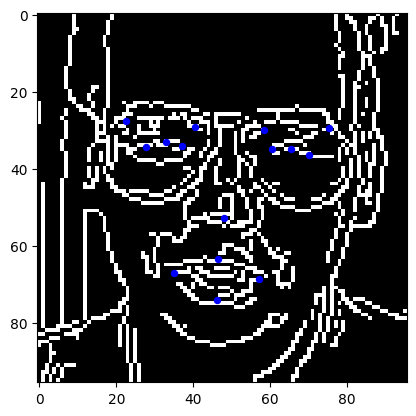

In [28]:
# Display information about a specific data point in the cached dataset
for img, keypoint in facial_keypoints_concatenated_train_dataset_cached.skip(13).take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    shape img: {img.shape}
    dtype img: {img.dtype}
    max intensity: {tf.reduce_max(img)}
    min intensity: {tf.reduce_min(img)}
    keypoint value: {keypoint}
    dtype keypoint: {keypoint.dtype}
    shape keypoint: {keypoint.shape}'''
    )

    # Plot the keypoints on the image
    for i in range(0, len(keypoint), 2):
        x = keypoint[i]
        y = keypoint[i+1]
        plt.scatter(x, y, s=75, marker='.', c='blue')
    plt.imshow(img, cmap='gray')
plt.show()

In [29]:
# Filter the cached dataset to get only the data points with NaN values in keypoints
get_nan_infacial_keypoints_train_datasets = facial_keypoints_concatenated_train_dataset_cached.filter(get_nan_in_data)

# Print the filtered dataset
print(get_nan_infacial_keypoints_train_datasets)
# Display the shape of the image and the keypoints for the first data point with NaN values
for image, keypoint in get_nan_infacial_keypoints_train_datasets.take(1):
    print("Image shape:", image.shape)
    print("Keypoints:", keypoint.numpy())

<_FilterDataset element_spec=(TensorSpec(shape=(96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>


Original Datasets


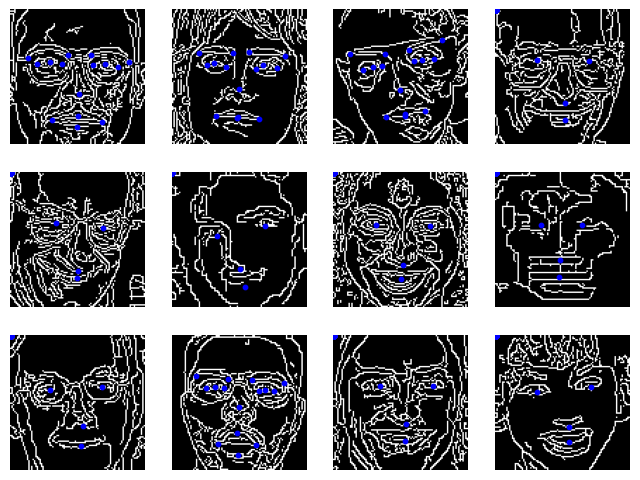

In [30]:
# Display original datasets
print('Original Datasets')
tf.random.set_seed(12)
show_multiple_images_with_keypoints_in_tf_datasets(
    dataset=facial_keypoints_concatenated_train_dataset_cached.take(int(len(facial_keypoints_concatenated_train_dataset_cached)/2)), 
    num_images=12, 
    figsize_per_image=(2, 2), 
    scatter_size=10, 
    scatter_color='blue'
)

Flipped Datasets


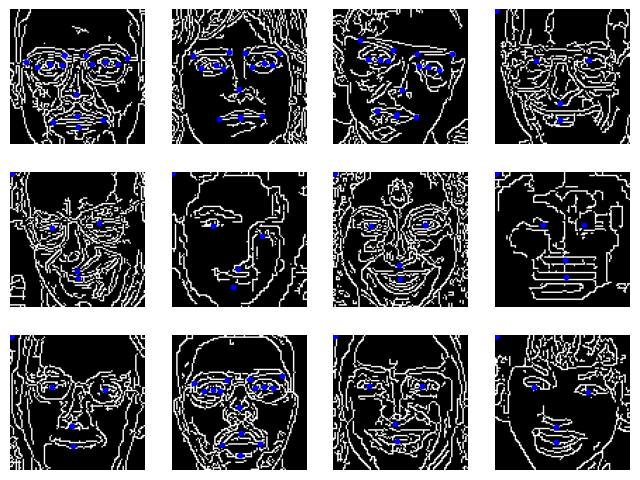

In [31]:
# Display flipped datasets
print('Flipped Datasets')
tf.random.set_seed(12)
show_multiple_images_with_keypoints_in_tf_datasets(
    dataset=facial_keypoints_concatenated_train_dataset_cached.skip(int(len(facial_keypoints_concatenated_train_dataset_cached)/2)), 
    num_images=12, 
    figsize_per_image=(2, 2), 
    scatter_size=10, 
    scatter_color='blue'
)

In [51]:
# Save the concatenated and cached training dataset to a TFRecord file with GZIP compression
# facial_keypoints_concatenated_train_dataset_cached.save("./Assets/datasets/canny_facial_keypoints_train_dataset.tfrecord", compression="GZIP")

In [32]:
# Create a deep copy of the test data
test_data_copy = test_data.copy(deep=True)

In [33]:
# Create a TensorFlow dataset from the test image data
facial_keypoints_test_datasets = tf.data.Dataset.from_tensor_slices(test_data_copy['Image'].values)

# Print information about the test dataset and the number of data points
print(f'info data: {facial_keypoints_test_datasets}')
print(f'number of data: {len(facial_keypoints_test_datasets)}')

info data: <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
number of data: 1783


==========================Check data=========================
    img value: b'182 183 182 182 180 '
    dtype img: <class 'bytes'>
=======================Convert to List=======================
    vector of img: [b'182' b'183' b'182' ... b'8' b'5' b'5'] 
    shape img: (9216,)
    dtype img: <dtype: 'string'>
======================Convert to Numeric=====================
    vector of img: [182. 183. 182. ...   8.   5.   5.] 
    shape img: (9216,)
    dtype img: <dtype: 'float32'>
    target image ndim: 96.0
    max intensity: 191.0
    min intensity: 0.0
============Reshape to height and width dimension============
    matriks of img: [[182. 183. 182. ... 182. 182. 182.]
 [182. 181. 181. ... 182. 182. 182.]
 [182. 181. 180. ... 182. 181. 182.]
 ...
 [ 42.  36.  20. ... 126. 136. 153.]
 [ 31.   8.   0. ...   9.  11.  33.]
 [  3.   0.   1. ...   8.   5.   5.]] 
    shape img: (96, 96)
    dtype img: <dtype: 'float32'>
    max intensity: 191.0
    min intensity: 0.0
====================

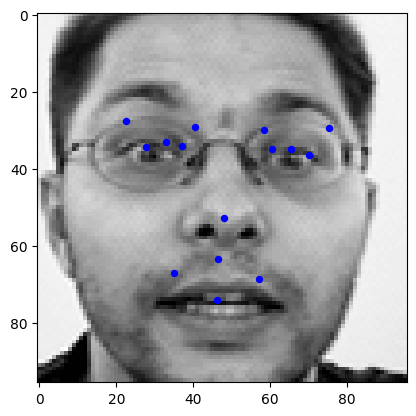

In [34]:
for img in facial_keypoints_test_datasets.take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    img value: {img[:20]}
    dtype img: {type(img)}'''
    )

    print(f"{'Convert to List'.center(61, '=')}")
    cvt_to_list = tf.strings.split(img, sep=' ')
    print(f'''    vector of img: {cvt_to_list} 
    shape img: {cvt_to_list.shape}
    dtype img: {cvt_to_list.dtype}'''
    )
    
    print(f"{'Convert to Numeric'.center(61, '=')}")
    cvt_to_num = image = tf.strings.to_number(cvt_to_list, out_type=tf.float32)
    print(f'''    vector of img: {cvt_to_num} 
    shape img: {cvt_to_num.shape}
    dtype img: {cvt_to_num.dtype}
    target image ndim: {tf.math.sqrt(cvt_to_num.shape[0] / 1.)}
    max intensity: {tf.reduce_max(cvt_to_num)}
    min intensity: {tf.reduce_min(cvt_to_num)}'''
    )

    print(f"{'Reshape to height and width dimension'.center(61, '=')}")
    cvt_to_img = tf.reshape(cvt_to_num, (96, 96))
    print(f'''    matriks of img: {cvt_to_img} 
    shape img: {cvt_to_img.shape}
    dtype img: {cvt_to_img.dtype}
    max intensity: {tf.reduce_max(cvt_to_img)}
    min intensity: {tf.reduce_min(cvt_to_img)}'''
    )

    print(f"{'Normalized image'.center(61, '=')}")
    normalized_img = (cvt_to_img / 255) * 1.0
    print(f'''    matriks of img: {normalized_img} 
    shape img: {normalized_img.shape}
    dtype img: {normalized_img.dtype}
    max intensity: {tf.reduce_max(normalized_img)}
    min intensity: {tf.reduce_min(normalized_img)}'''
    )

    for i in range(0, len(keypoint), 2):
        x = keypoint[i]
        y = keypoint[i+1]
        plt.scatter(x, y, s=75, marker='.', c='blue')
    plt.imshow(normalized_img, cmap='gray')
plt.show()

In [35]:
# Define a function to preprocess the test data
def preprocessing_test_data(image, input_shape=None):
    # Split the image string into a list of numbers
    image = tf.strings.split(image, sep=' ')
    # Convert the split strings into numbers
    image = tf.strings.to_number(image, out_type=tf.float32)
    # Normalize the pixel values to the range [0, 1]
    image = (image / 255) * 1.0
    # Reshape the image to its original shape (e.g., 96x96 if the image is 96x96 pixels)
    image = tf.reshape(image, input_shape)
    return image

In [36]:
# Preprocess the test dataset by normalizing and reshaping the images
facial_keypoints_test_datasets_processed = facial_keypoints_test_datasets.map(
    map_func=lambda image: 
        preprocessing_test_data(
            image=image, 
            input_shape=(96, 96, 1)  # Reshape the image to 96x96 with 1 channel
        ),
    num_parallel_calls=tf.data.AUTOTUNE  # Use multiple threads for parallel processing
)

# Cache the processed test dataset for faster access
facial_keypoints_test_dataset_cached = facial_keypoints_test_datasets_processed.cache()

In [37]:
# Print information about the cached test dataset and the number of data points
print(f'info data: {facial_keypoints_test_dataset_cached}')
print(f'number of data: {len(facial_keypoints_test_dataset_cached)}')

info data: <CacheDataset element_spec=TensorSpec(shape=(96, 96, 1), dtype=tf.float32, name=None)>
number of data: 1783


==========================Check data=========================
    shape img: (96, 96, 1)
    dtype img: float32
    max intensity: 0.9686274528503418
    min intensity: 0.007843137718737125
    keypoint value: [65.27058824 34.94023529 33.0227451  32.97694118 60.50321569 34.94023529
 70.03733333 36.34196078 36.94870588 34.09882353 27.69505882 34.37929412
 58.26007843 29.89239216 75.36501961 29.33145098 40.34572549 29.16831373
 22.64784314 27.6492549  47.88454902 52.88658824 57.13819608 68.58917647
 34.98541176 67.18745098 46.48282353 63.54196078 46.20235294 74.19796078]
    dtype keypoint: float64


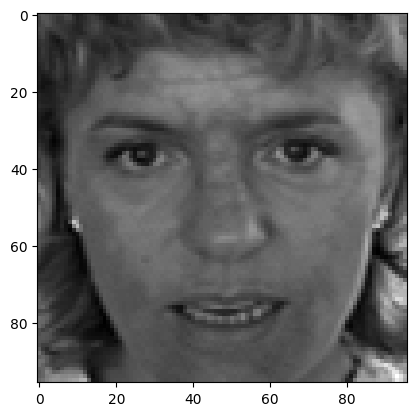

In [38]:
for img in facial_keypoints_test_dataset_cached.skip(1).take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    shape img: {img.shape}
    dtype img: {img.dtype}
    max intensity: {tf.reduce_max(img)}
    min intensity: {tf.reduce_min(img)}
    keypoint value: {keypoint}
    dtype keypoint: {keypoint.dtype}'''
    )
    plt.imshow(img, cmap='gray')
plt.show()

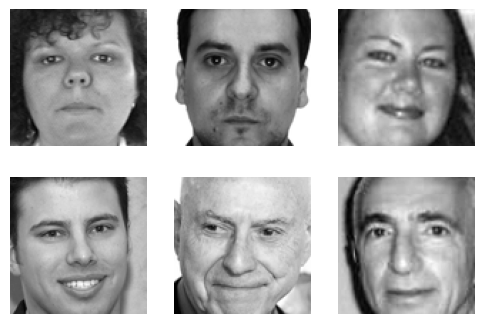

In [39]:
# Display multiple images from the cached test dataset
show_multiple_images_with_keypoints_in_tf_datasets(facial_keypoints_test_dataset_cached.map(lambda x: (x, None)), num_images=6)

In [60]:
# Save the cached test dataset to a TFRecord file with GZIP compression
facial_keypoints_test_dataset_cached.save("./Assets/datasets/facial_keypoints_test_dataset.tfrecord", compression="GZIP")